# Predicting the Optimum number of Clusters for IRIS Dataset

# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data

In [3]:
data=pd.read_csv("iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Here the dataset already contains the labels. So lets explore the dataset first and then remove the species column from the dataset. After that we can predict the optimum number of clusters.

# Data Preprocessing

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
data.shape

(150, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#Finding the unique types of species
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Data Visualization

In [7]:
data.corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### This shows that there is high correlation between petal length and petal width

## Correlation Heatmap

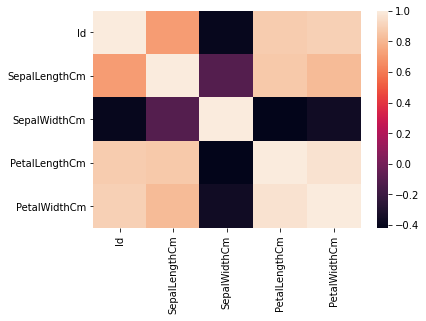

In [6]:
sn.heatmap(data.corr())

## Pie Chart

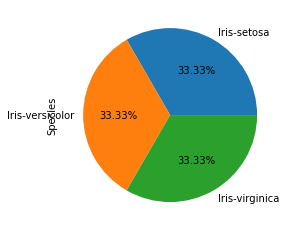

In [13]:
data['Species'].value_counts().plot(kind='pie',autopct="%0.2f%%")

### This pie chart clearly shows that the 3 species are present in equal proportions

## Scatter Plots

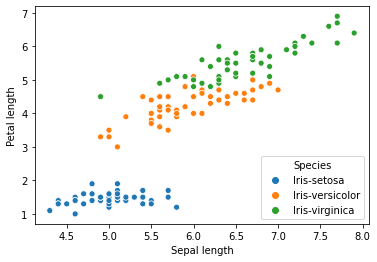

In [29]:
sn.scatterplot(x='SepalLengthCm',y='PetalLengthCm',hue='Species',data=data)
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc='lower right')
plt.show()

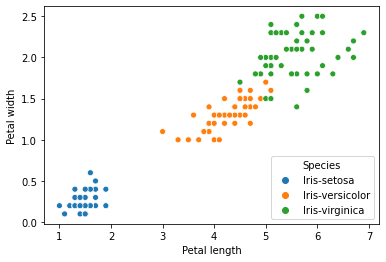

In [30]:
sn.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=data)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc='lower right')
plt.show()

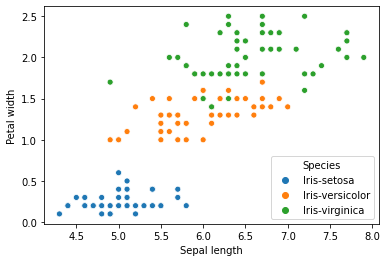

In [31]:
sn.scatterplot(x='SepalLengthCm',y='PetalWidthCm',hue='Species',data=data)
plt.xlabel("Sepal length")
plt.ylabel("Petal width")
plt.legend(loc='lower right')
plt.show()

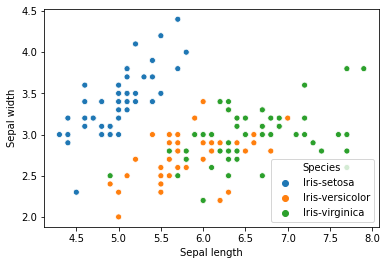

In [32]:
sn.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=data)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend(loc='lower right')
plt.show()

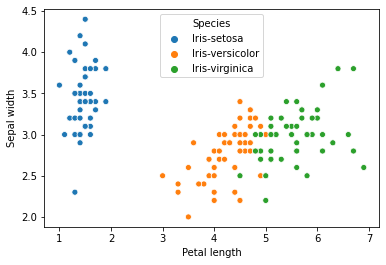

In [33]:
sn.scatterplot(x='PetalLengthCm',y='SepalWidthCm',hue='Species',data=data)
plt.xlabel("Petal length")
plt.ylabel("Sepal width")
plt.legend(loc='upper center')
plt.show()

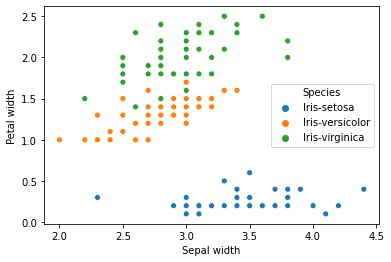

In [34]:
sn.scatterplot(x='SepalWidthCm',y='PetalWidthCm',hue='Species',data=data)
plt.xlabel("Sepal width")
plt.ylabel("Petal width")
plt.legend(loc='center right')
plt.show()

## Countplots

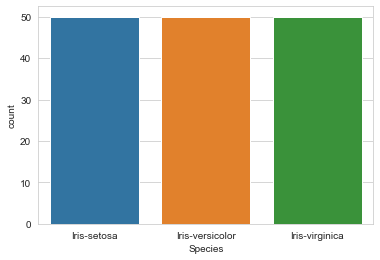

In [16]:
sn.set_style('whitegrid')
sn.countplot(x="Species",data=data)

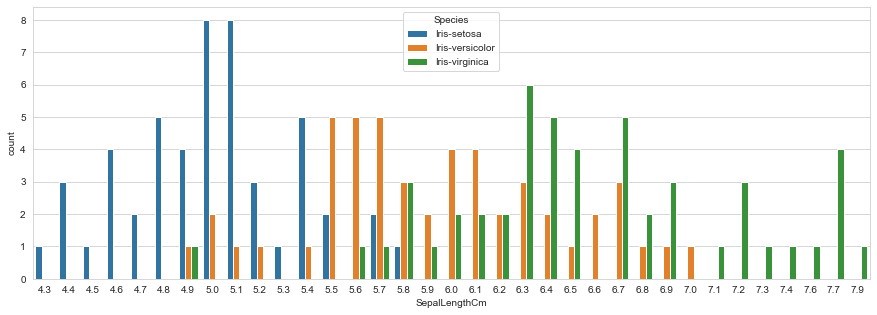

In [17]:
plt.figure(figsize=(15,5))
sn.countplot(x="SepalLengthCm",data=data,hue="Species")

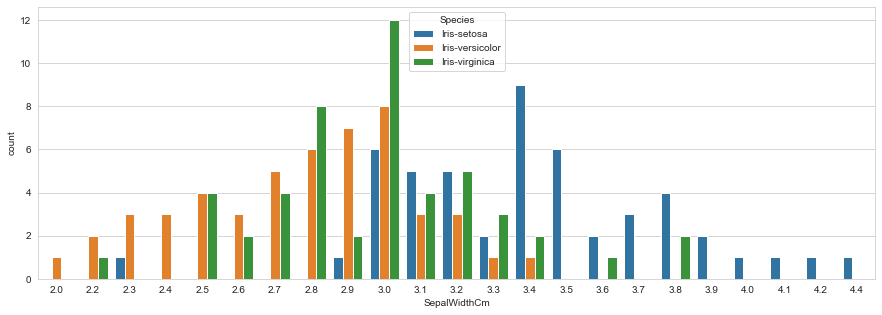

In [18]:
plt.figure(figsize=(15,5))
sn.countplot(x="SepalWidthCm",data=data,hue="Species")

## Pairplots

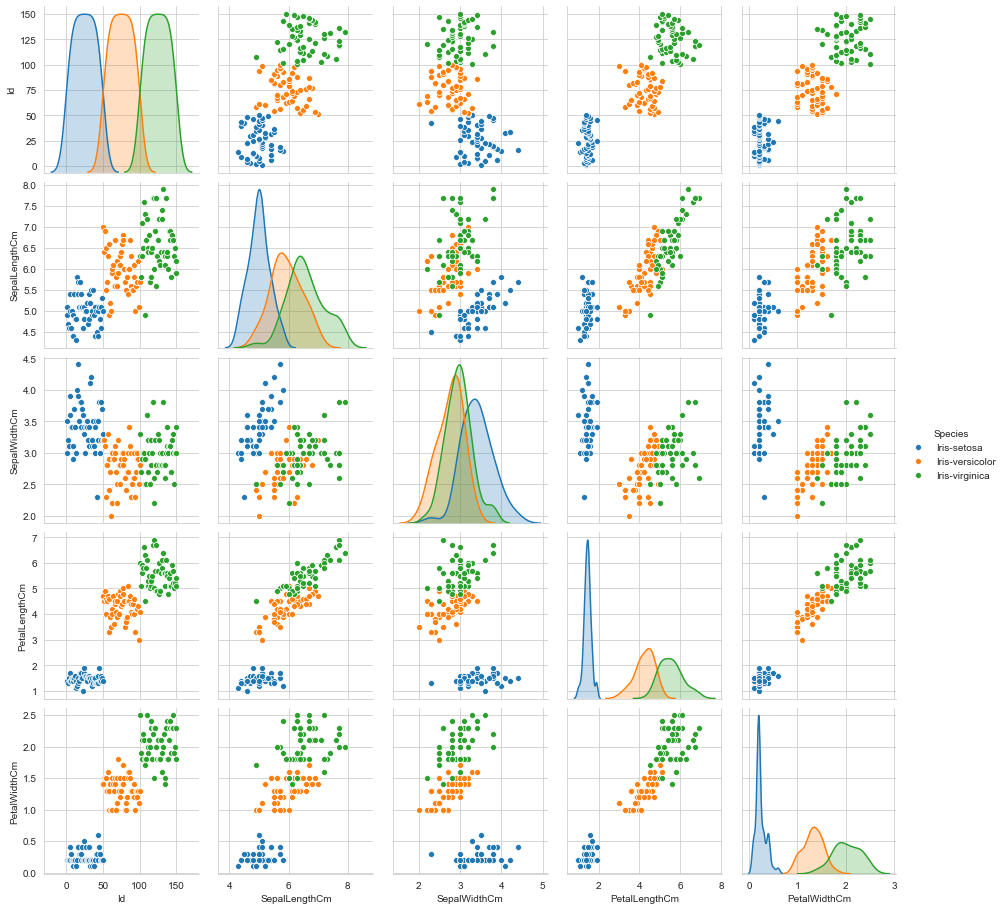

In [19]:
sn.pairplot(data,hue='Species')

## Distribution Plots

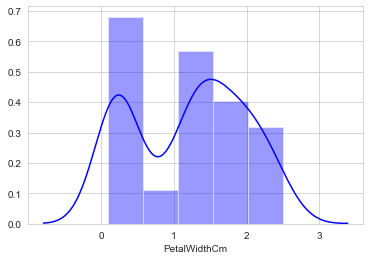

In [20]:
sn.distplot(data["PetalWidthCm"],color='blue')

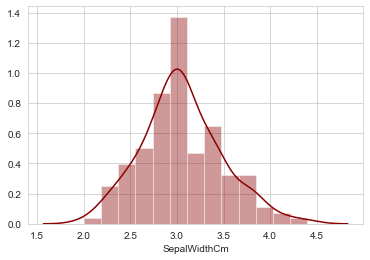

In [21]:
sn.distplot(data['SepalWidthCm'],color='darkred')

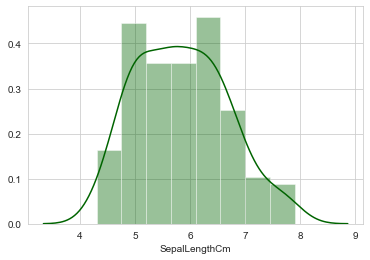

In [22]:
sn.distplot(data['SepalLengthCm'],color='darkgreen')

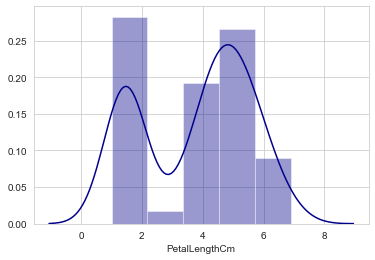

In [23]:
sn.distplot(data['PetalLengthCm'],color='darkblue')

## Joint Plots

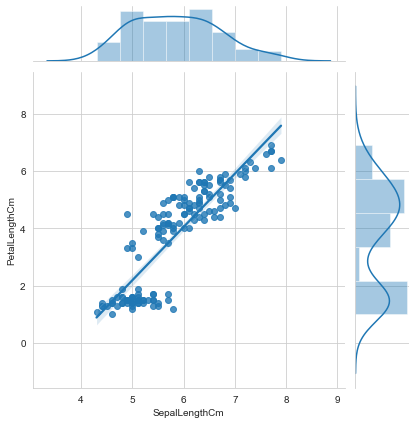

In [24]:
sn.jointplot(x='SepalLengthCm',y="PetalLengthCm",data=data,kind='reg')

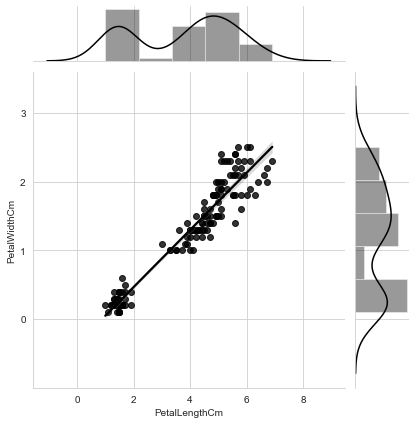

In [25]:
sn.jointplot(x='PetalLengthCm',y="PetalWidthCm",data=data,kind='reg',color='black')

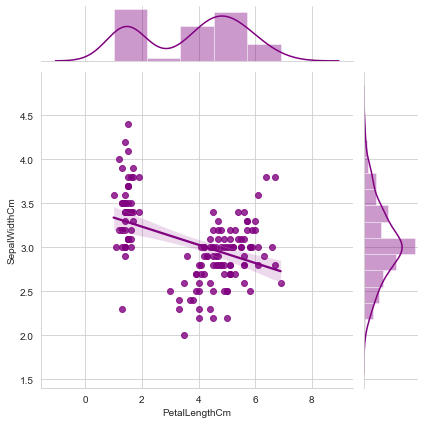

In [26]:
sn.jointplot(x='PetalLengthCm',y="SepalWidthCm",data=data,kind='reg',color='purple')

## Histograms

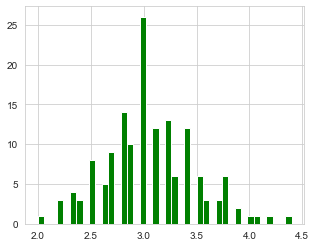

In [27]:
data["SepalWidthCm"].hist(color='green',bins=40,figsize=(5,4))

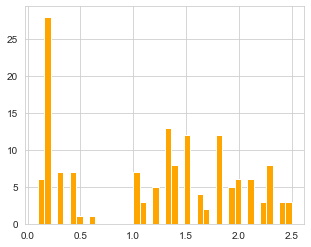

In [28]:
data["PetalWidthCm"].hist(color='orange',bins=40,figsize=(5,4))

## Box Plots

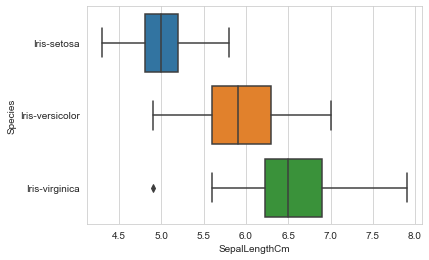

In [29]:
sn.boxplot(x='SepalLengthCm',y='Species',data=data)

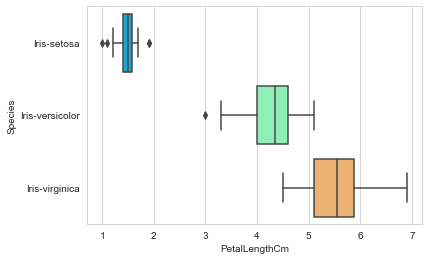

In [30]:
sn.boxplot(x='PetalLengthCm',y='Species',data=data,palette='rainbow')

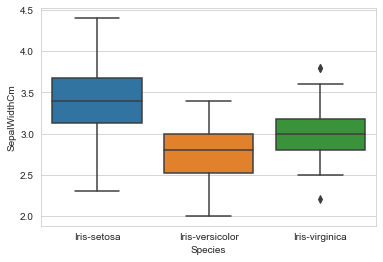

In [31]:
sn.boxplot(y='SepalWidthCm',x='Species',data=data)

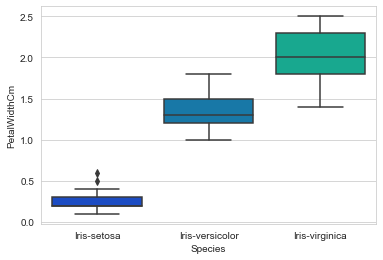

In [32]:
sn.boxplot(y='PetalWidthCm',x='Species',data=data,palette='winter')

# Predicting the Optimum number of Clusters

In [33]:
data.drop(['Id','Species'],axis=1,inplace=True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Elbow Method

In [34]:
from sklearn.cluster import KMeans
wcss=[] #Within Cluster Sum of Squares

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

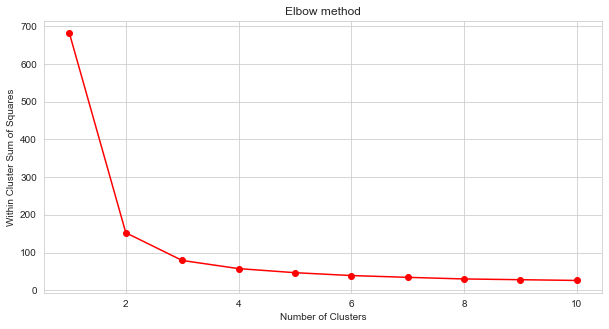

In [35]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,marker="o",color='r')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.title("Elbow method")
plt.show()

### From the elbow diagram it can be seen that at approximately n_clusters>=3, the wcss doesn't decrease significantly.
### Hence optimum number of clusters is equal to 3

# Applying n_clusters=3 to the data for creating KMeans Classifier

In [36]:
kmeans=KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(data)

# Visualizing the Clusters

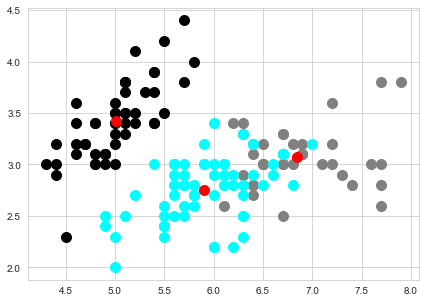

In [37]:
data=np.array(data)
plt.figure(figsize=(7,5))
plt.scatter(data[y_kmeans == 0,0], data[y_kmeans == 0,1], s=100, c='grey', label='Iris_Setosa')
plt.scatter(data[y_kmeans == 1,0], data[y_kmeans == 1,1], s=100, c='black', label='Iris_Vericolor')
plt.scatter(data[y_kmeans == 2,0], data[y_kmeans == 2,1], s=100, c='cyan', label='Iris_Virginica')

#Plotting the centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', label="Centroids")
#plt.legend(loc='upper left')
plt.show()